In [66]:
import numpy as np
from glob import glob

# Dateinamen, anhand der von mir sortierten Ordnern
human_files = np.array(glob('Humans/*'))
nohuman_files = np.array(glob('Rest/*'))

print('%d Bilder mit Menschen.' % len(human_files))
print('%d ohne Menschen.' % len(nohuman_files))


13 Bilder mit Menschen.
87 ohne Menschen.


In [67]:
##Alternative:
#from PIL import Image
#human_files = np.array([np.array(Image.open(fname)) for fname in filelist])
#len(x)

In [68]:
#import glob
#filelist = glob.glob('Humans/*')
#filelist

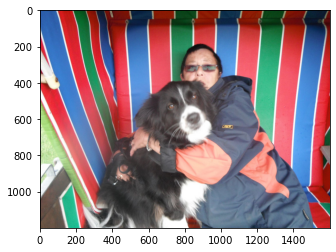

In [103]:
#Check, dass die Bilder richtig geladen werden

img_test = plt.imread(human_files[5])
plt.imshow(img_test)
plt.show()


Erkannte Gesichter: 2


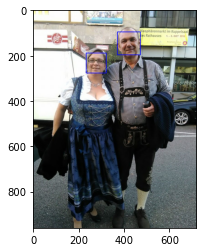

In [136]:
# Test mit dem OpenCV Gesichtserkennungs-Algorithmus. Für andere OpenCV-Klassifier die XML-Datei ändern

import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[8])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Erkannte Gesichter:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()



In [99]:
# Funktion: Spielt "True" zurück, wenn ein Gesicht erkannt wurde im Bild
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [135]:
#Erkennung von Gesichtern in meinen Human (13 Bilder) / no Human (87 Bilder) - Ordnern

from tqdm import tqdm


human_face=0
for i in tqdm(human_files):
    face = face_detector(i)
    if face == True:
        human_face += 1

nohuman_face = 0
for i in tqdm(nohuman_files):
    face = face_detector(i)
    if face == False:
        nohuman_face += 1

print('Korrekte Gesichter im Human-Ordner:', human_face)
print('Gesichter im Rest-Ordner erkannt', 100-nohuman_face)

100%|██████████████████████████████████████████████████████████████████████████████████| 87/87 [00:31<00:00,  2.80it/s]

Korrekte Gesichter im Human-Ordner: 9
Gesichter im Rest-Ordner erkannt 29


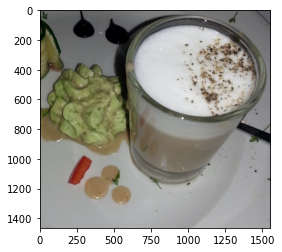

True

In [130]:
#Beispiel eines Bildes, wo fälschlicherweise ein Gesicht erkannt wurde

testbild_url = nohuman_files[24]
testbild = plt.imread(testbild_url)
plt.imshow(testbild)
plt.show()

face_detector(testbild_url)